In [3]:
#task 1
import pandas
import numpy as np

data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")
print(data)
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

data1 = pandas.DataFrame({'t' : t, 'sin' : sin_t, 'cos' : cos_t})
print(data1)
print(type(data1))

    Unnamed: 0  Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0            1  Female   133  132  124   118.0    64.5     816932
1            2    Male   140  150  124     NaN    72.5    1001121
2            3    Male   139  123  150   143.0    73.3    1038437
3            4    Male   133  129  128   172.0    68.8     965353
4            5  Female   137  132  134   147.0    65.0     951545
5            6  Female    99   90  110   146.0    69.0     928799
6            7  Female   138  136  131   138.0    64.5     991305
7            8  Female    92   90   98   175.0    66.0     854258
8            9    Male    89   93   84   134.0    66.3     904858
9           10    Male   133  114  147   172.0    68.8     955466
10          11  Female   132  129  124   118.0    64.5     833868
11          12    Male   141  150  128   151.0    70.0    1079549
12          13    Male   135  129  124   155.0    69.0     924059
13          14  Female   140  120  147   155.0    70.5     856472
14        

In [33]:
#task 2
print(data.shape)
print(data.columns)
print(data['Gender'])
print(data[data['Gender'] == 'Female']['VIQ'].mean())

groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))
print(groupby_gender.mean())

#print mean VIQ
print(data['VIQ'].mean())
#count males and females
for gender, value in groupby_gender['Gender']:
    print(gender, value.count())
#mean MRI for males and females
for gender, value in groupby_gender['MRI_Count']:
    print(gender, value.mean())

#boxplot!!!!!!!!!!!!!

(40, 8)
Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')
0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object
109.45
('Female', 109.45)
('Male', 115.25)
        Unnamed: 0   FSIQ     VIQ     PIQ      Weight     Height  MRI_Count
Gender                                                                     
Female       19.65  111.9  109.45  110.45  137.200000  65.765000   862654.6
Male         21.35  115.0  115.25  111.60  166.444444  71

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002148A7F6EF0>,
      dtype=object)

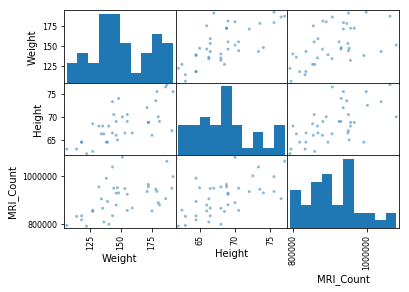

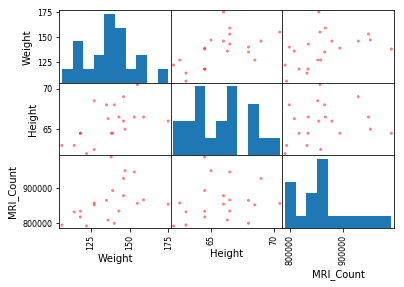

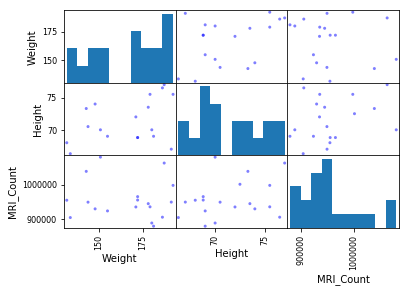

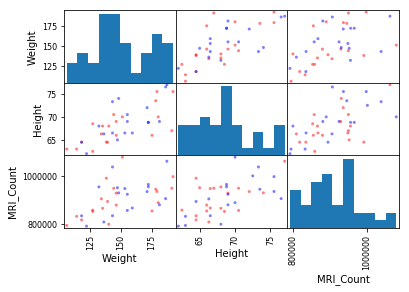

In [34]:
#task 3
from pandas import plotting
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])

groupby_gender = data.groupby('Gender')
colors = {'Female' : 'r', 'Male' : 'b'}
for gender, value in groupby_gender:
    plotting.scatter_matrix(value[['Weight', 'Height', 'MRI_Count']], color=colors[gender])

color_points = data['Gender'].map(lambda x: colors[x])
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']], color=color_points)

In [35]:
#task 4
from scipy import stats
stats.ttest_1samp(data['VIQ'], 0)

female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
print(stats.ttest_ind(female_viq, male_viq))

print(stats.ttest_ind(data['FSIQ'], data['PIQ']))
print(stats.ttest_rel(data['FSIQ'], data['PIQ']))
print(stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0))

female_weight = data[data['Gender'] == 'Female']['Weight']
male_weight = data[data['Gender'] == 'Male']['Weight']
print(stats.ttest_ind(female_weight, male_weight))

#непараметрическая статистика

Ttest_indResult(statistic=-0.77261617232750113, pvalue=0.44452876778583217)
Ttest_indResult(statistic=0.46563759638096403, pvalue=0.64277250094148408)
Ttest_relResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)
Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)


In [44]:
#task 5
import numpy as np
from statsmodels.formula.api import ols

x = np.linspace(-5, 5, 20)
np.random.seed(1)

y = -5 + 3 * x + 4 * np.random.normal(size=x.shape)
data = pandas.DataFrame({'x' : x, 'y' : y})

from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()
print(model.summary())

data = pandas.read_csv('brain_size.csv', sep=';', na_values='.')
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary())

data_fsiq = pandas.DataFrame({'iq' : data['FSIQ'], 'type' : 'fisq'})
data_piq = pandas.DataFrame({'iq' : data['PIQ'], 'type' : 'piq'})
data_long = pandas.concat((data_fsiq, data_piq))
print(data_long)
model = ols("iq ~ type", data_long).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           8.56e-08
Time:                        16:32:35   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

E:\Anaconda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


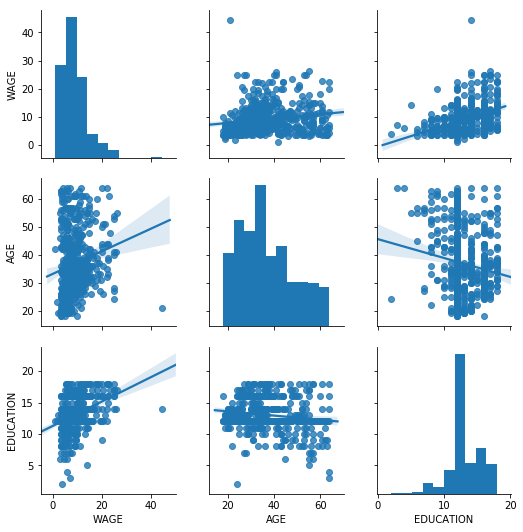

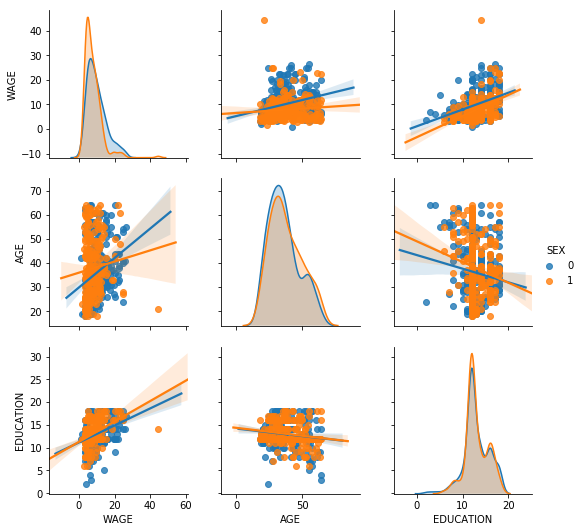

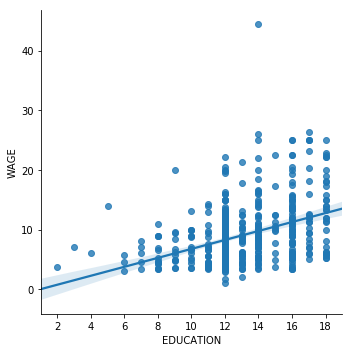

In [48]:
#task 6
import seaborn
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of yers of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: year',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Serviсe, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construstion',
    'MARR: 0=Unmarried, 1=Mrried',
]
short_names = [n.split(':')[0] for n in names]
data = pandas.read_csv('data2.txt', sep = '\t')
data.columns = short_names

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg')
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg', hue='SEX')
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)